In this file we try to explain what the current situation is for the MW switch box is (as of Feb 2021), what we are missing and what we want to achieve in the future. 

### Current Microwave box

In the current Microwave Switch Box design, we directly connect a power supply to the box and use a Fischer connector/cable (24 pin; D-105A093 connector). The box has 7 push buttons (6 for the different channels + 1 for a "total" reset). The GND of the power supply is directly coupled to pin8 of the Fischer cable and therefore the ground of the MW switch (Radial R591763600). The positive pin of the power supply is connected in parallel to all 7 push buttons, which are in turn connected to the fisher cables and respective port to control the MW switch inside the fridge. 

The design looks as follows:
<img 
src=attachment:image-22cd18b6-7a50-426a-b197-948eb05f3620.jpg width="500"
/>

<img 
src=attachment:current_model.png width="500"
/>

One downside of this design is that one should be physically next to the fridge to switch between ports (e.g. devices). 
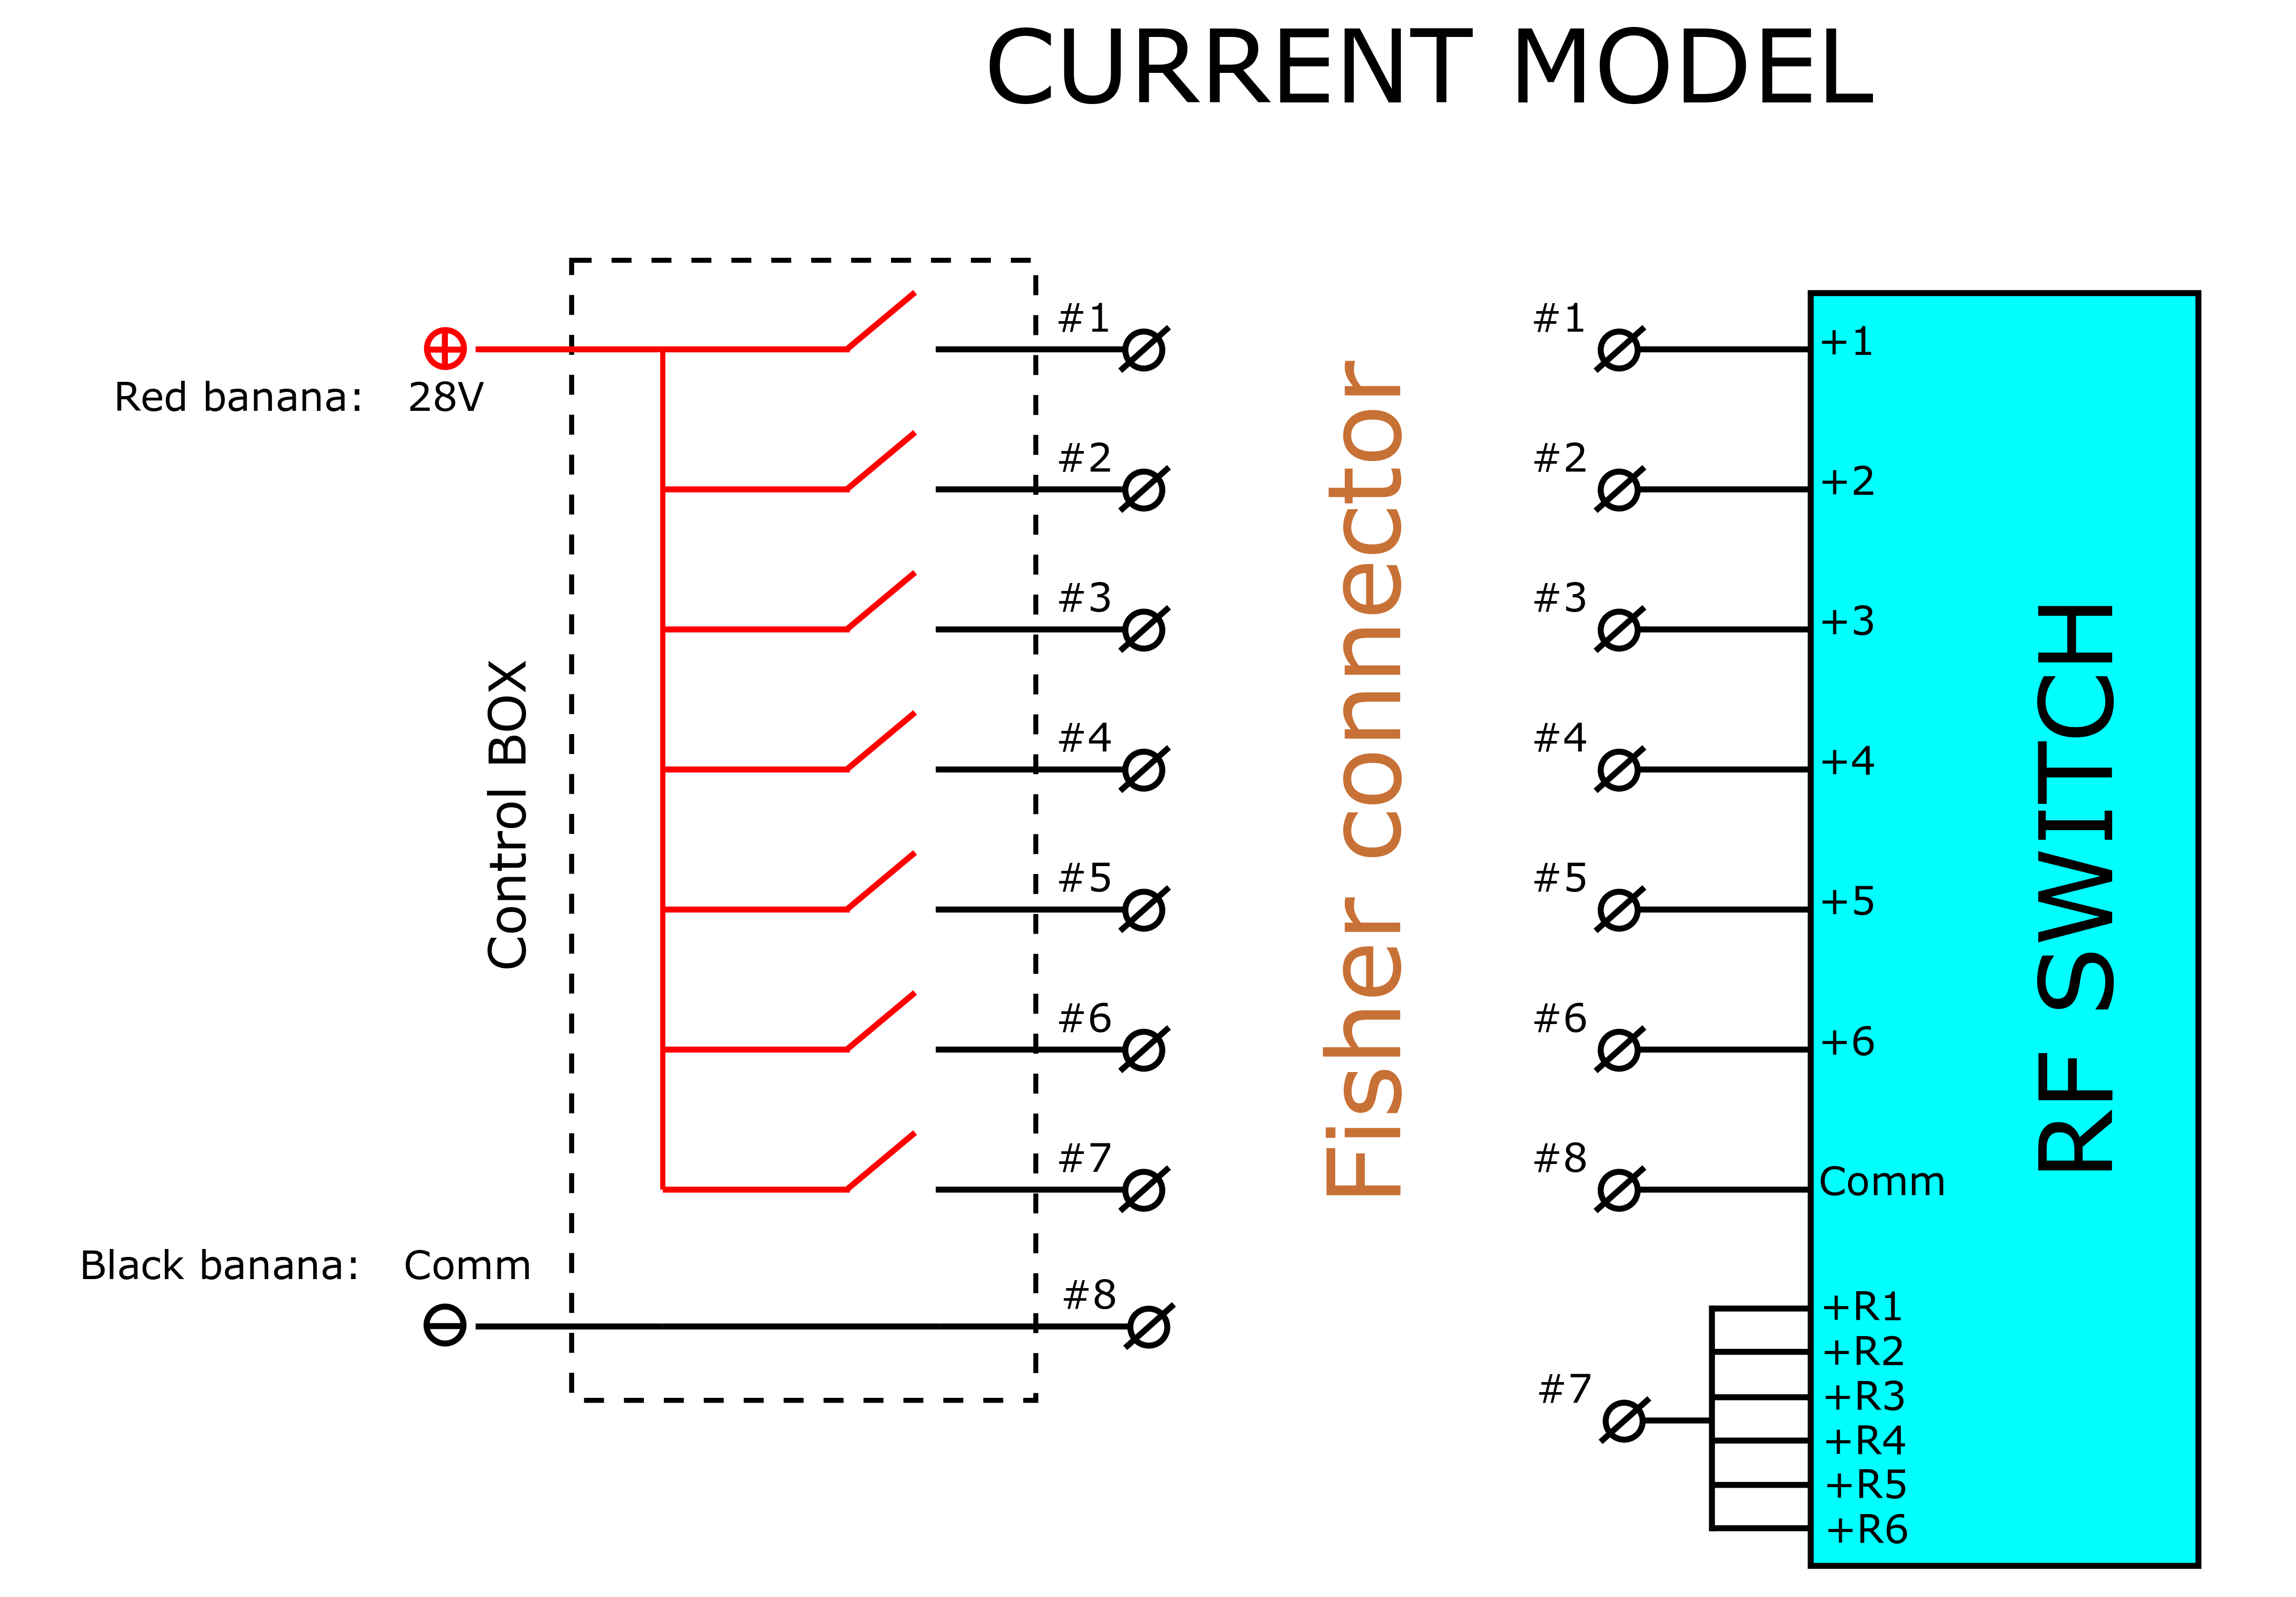
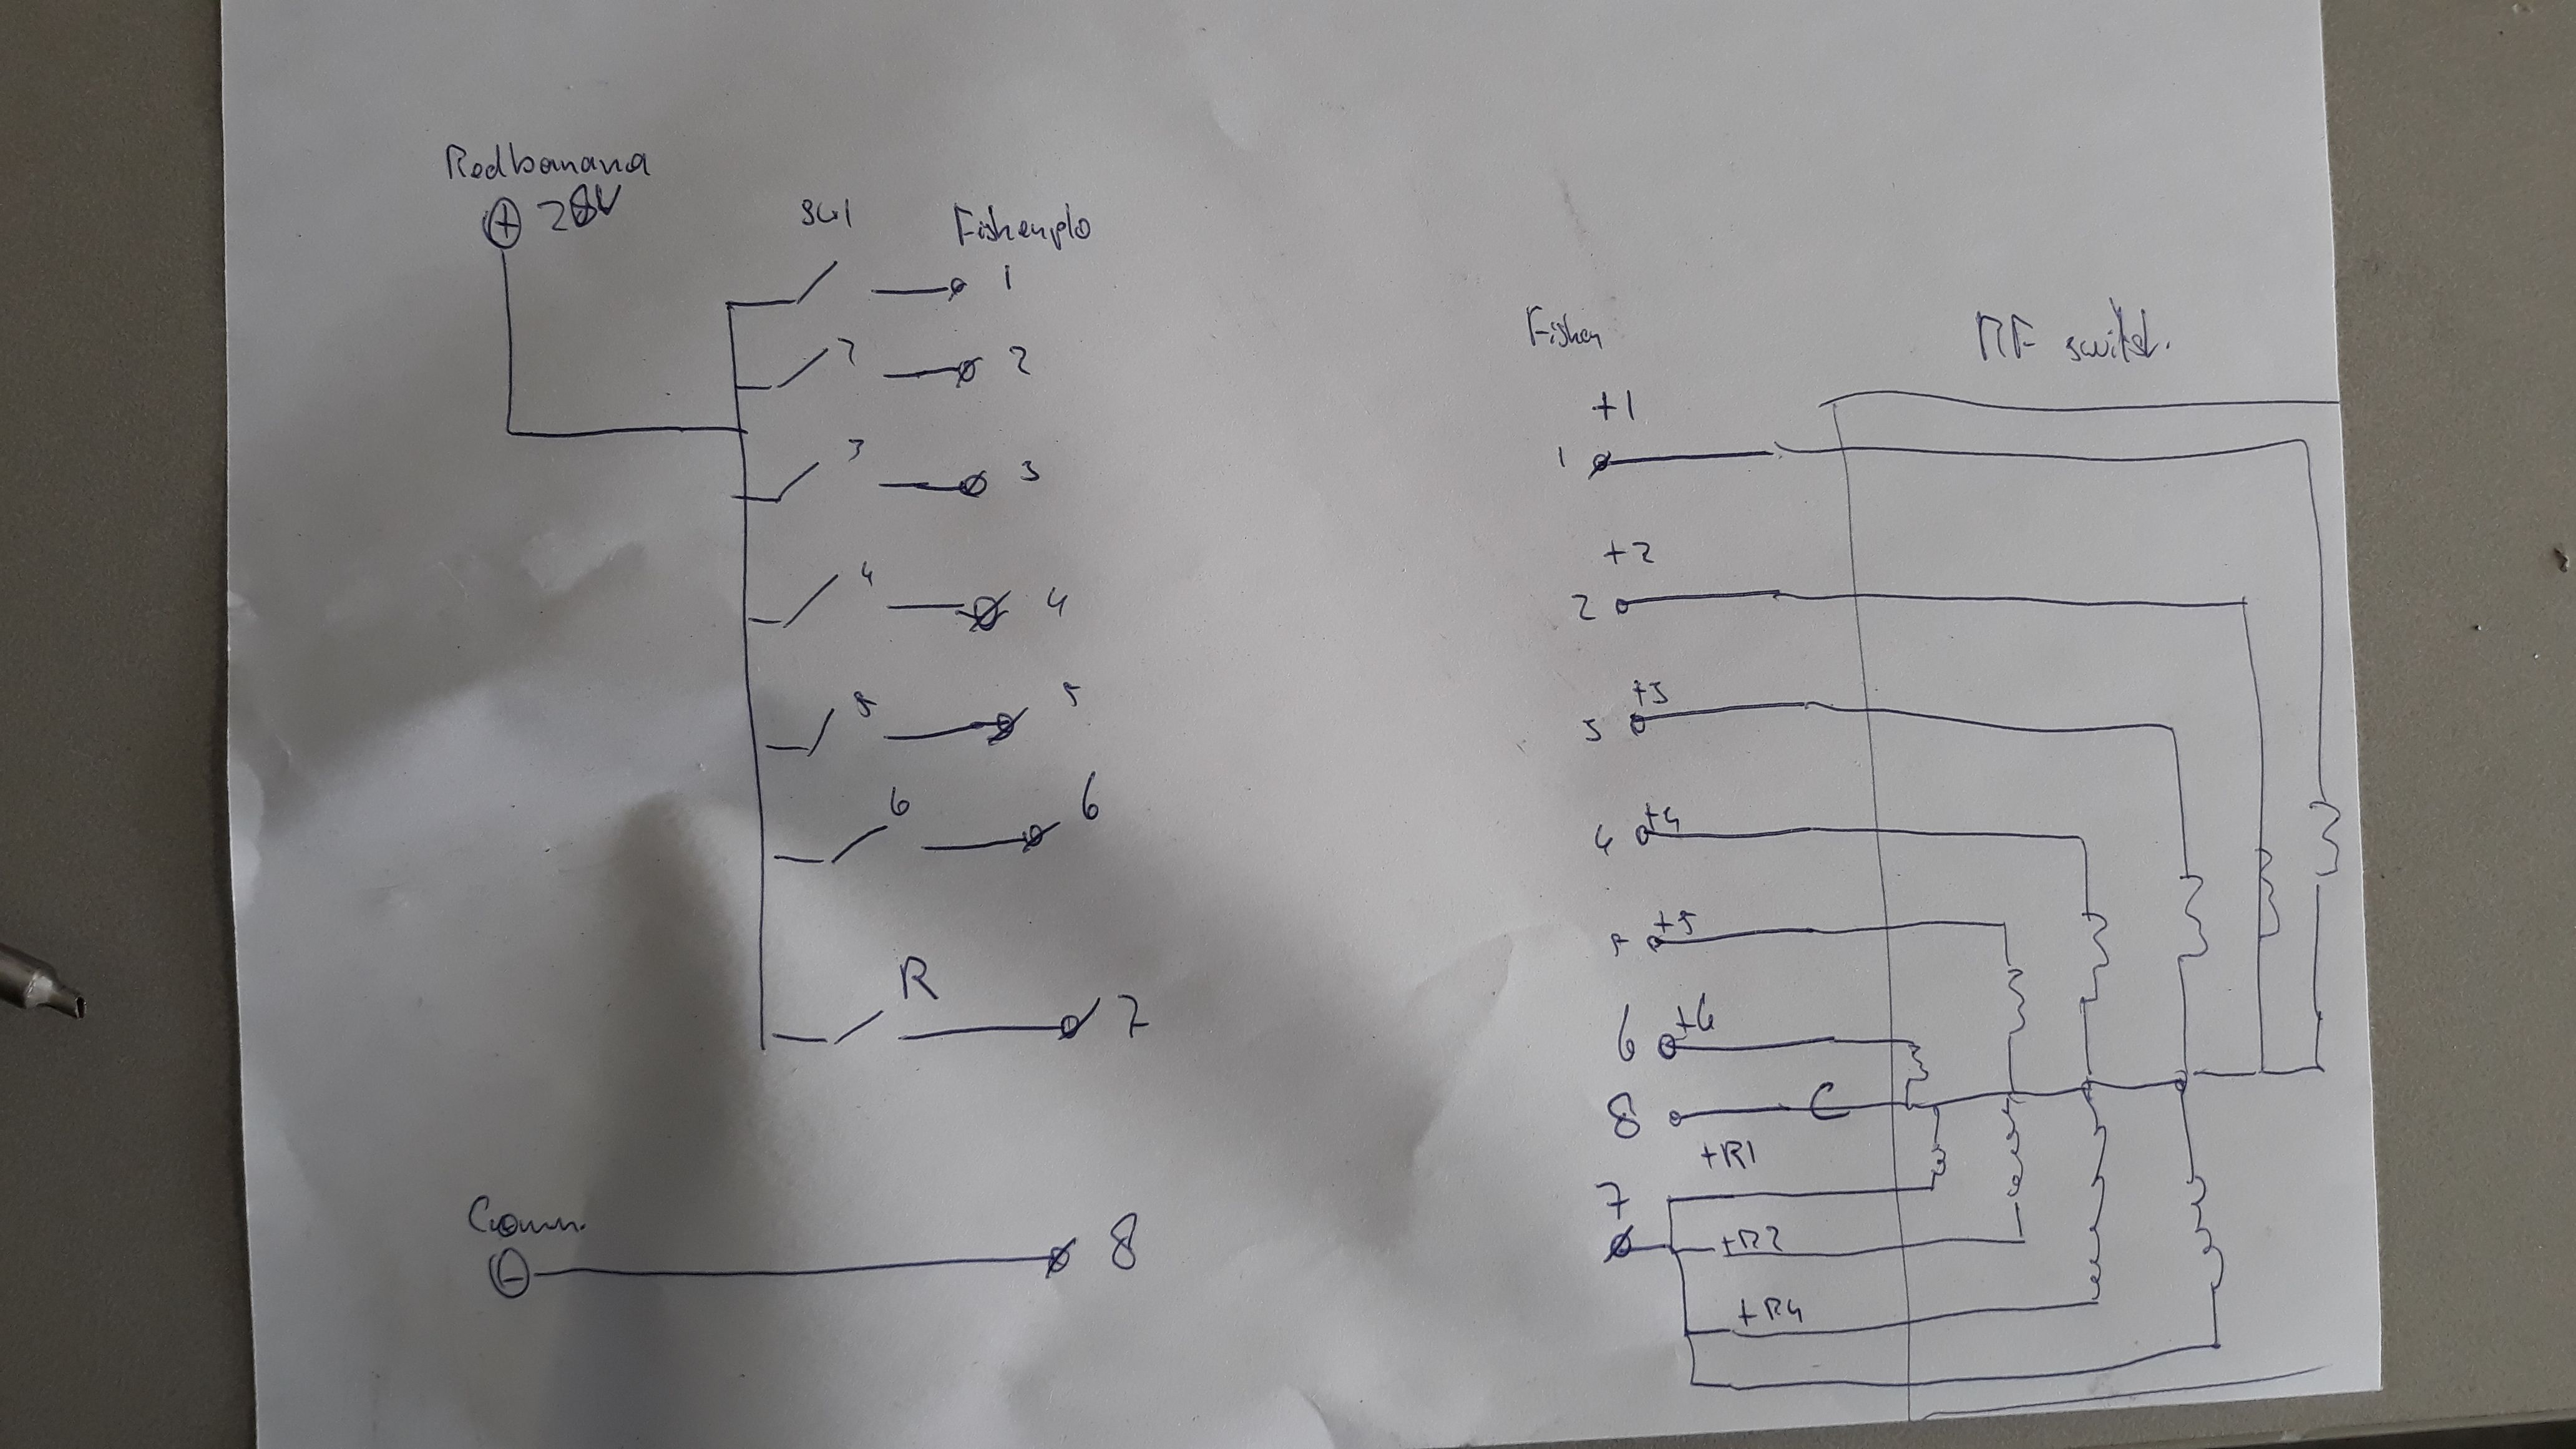

### Idea

To be clear:
* there's nothing wrong with the MW Switch (fridge side) of the current design. 
* All pin numbers and placements should stay the same at both the control box and fridge. 
* We should alter the control box side of the design!
* we want to remotely access the control box

One way is to use power MOSFETS to replace the push buttons in the current design. The MOSFETs could be controlled by an Arduino, which in turn we can control via python on the PC (via pyserial). Off course, the python scripts we can write ourself, and even control via Remote Desktop Connection, without being physically next to the fridge.

### Which MOSFET to use?
#### N-channel MOSFETs
Looking at this youtube videao: https://www.youtube.com/watch?v=3PkpOeHTnfo

In this video, the guy explains (briefly) how to simply connect a 12V motor and control it with a very simplistic Arduino code. The following figure shows a schematic for the electric circuit from the video

<img 
src=attachment:N_channelMOSFET_example.png width="500"
/>

Here they use:
* a N-channel MOSFET (postive side of external power source connected to the Drain of the MOSFET)
* 12V power source
* 12V DC motor (M)
* diode (to prevent residual current from the spools/coils in the motor to fry the circuit after the motor is shut down)
    * this stands for our MW-switch as well since we use coils inside the switch as well
* 10K pull up/down? resistor between the Source and the Gate of the MOSFET 
    * this prevent half active states controlling the MOSFET
* All grounds are connected
* Arduino output pins connected to the Gate pin of the MOSFET

The basics of this schematic will hold for our MW switch! Instead of using a motor we use coils between the MW-switch channels! See figure below:

<img 
src=attachment:MWswitch_channels.PNG width="500"
/>

##### This doesn't work for us!
Unfortunately, the N-channel MOSFETs will not work with our current design! For it to work we have to change the pin numbers and connection in the MW-switch (so inside the fridge). This will take a lot of effort to change it! This will also give problems when we excidentally switch manual and remote controlled boxes around! So, either we change all pins and boxes from the current setup or we use P-channel MOSFETs instead!
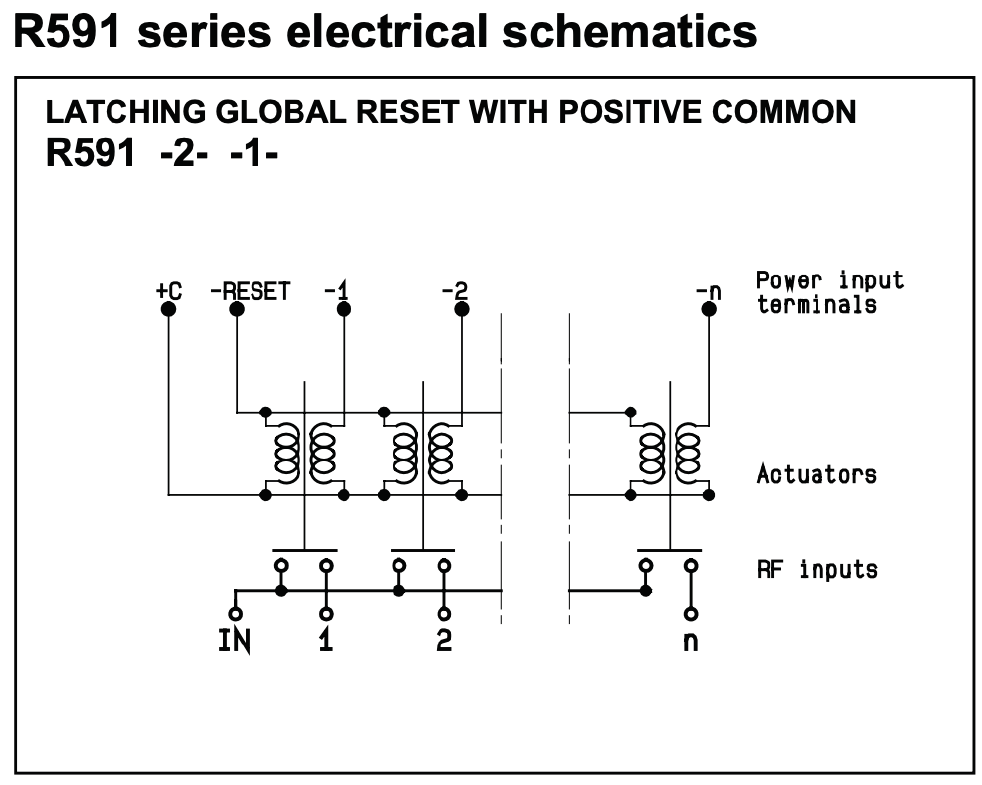
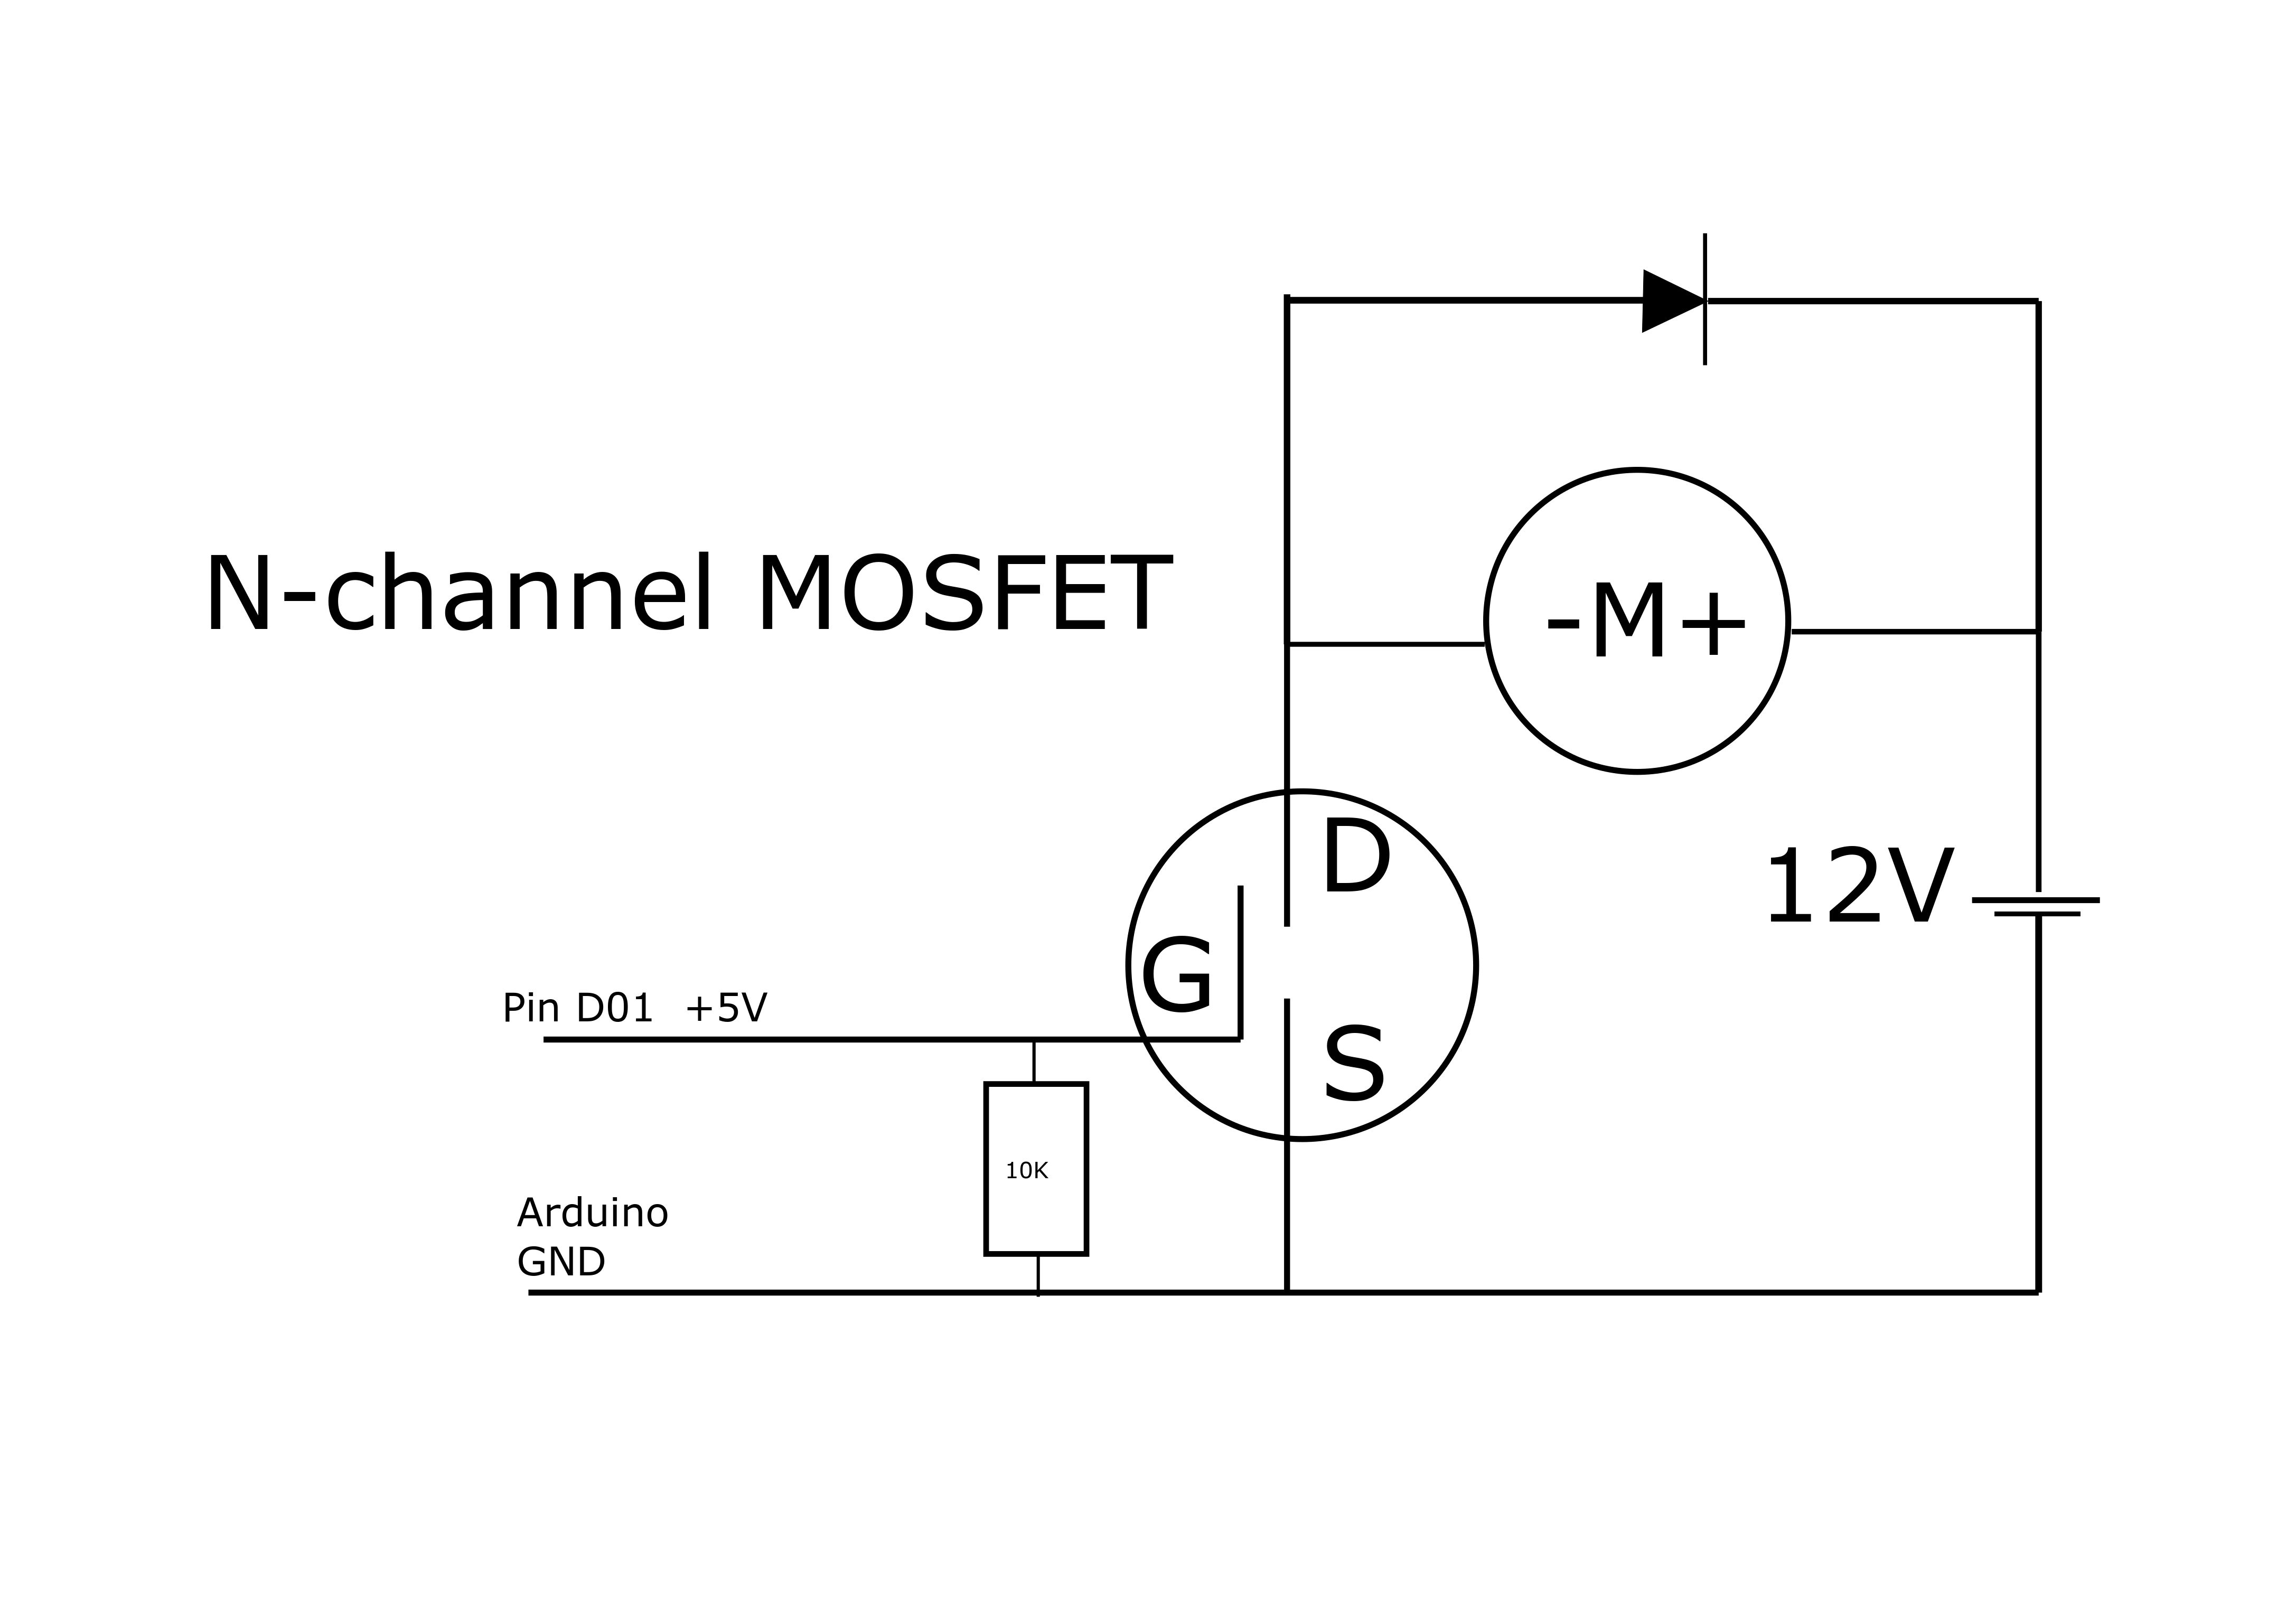

#### P-channel MOSFETs
From the same youtube channel we have an equivalant video about P-channel MOSFETs: https://www.youtube.com/watch?v=ek8HBjonXdA

In this video, the same guy explains (again briefly) how to simply connect a 12V motor and control it with a very simplistic Arduino code. The following figure shows a schematic for the electric circuit from the video

<img 
src=attachment:P_channelMOSFET_example.png width="500"
/>

This might work. Currently I'm working on the electrical circuit (see next section), but will need some help and approval before continuing for searching the right P-channel MOSFETs (which can take 28V and 60 mA???). Need to make a list of the power supply settings as well!
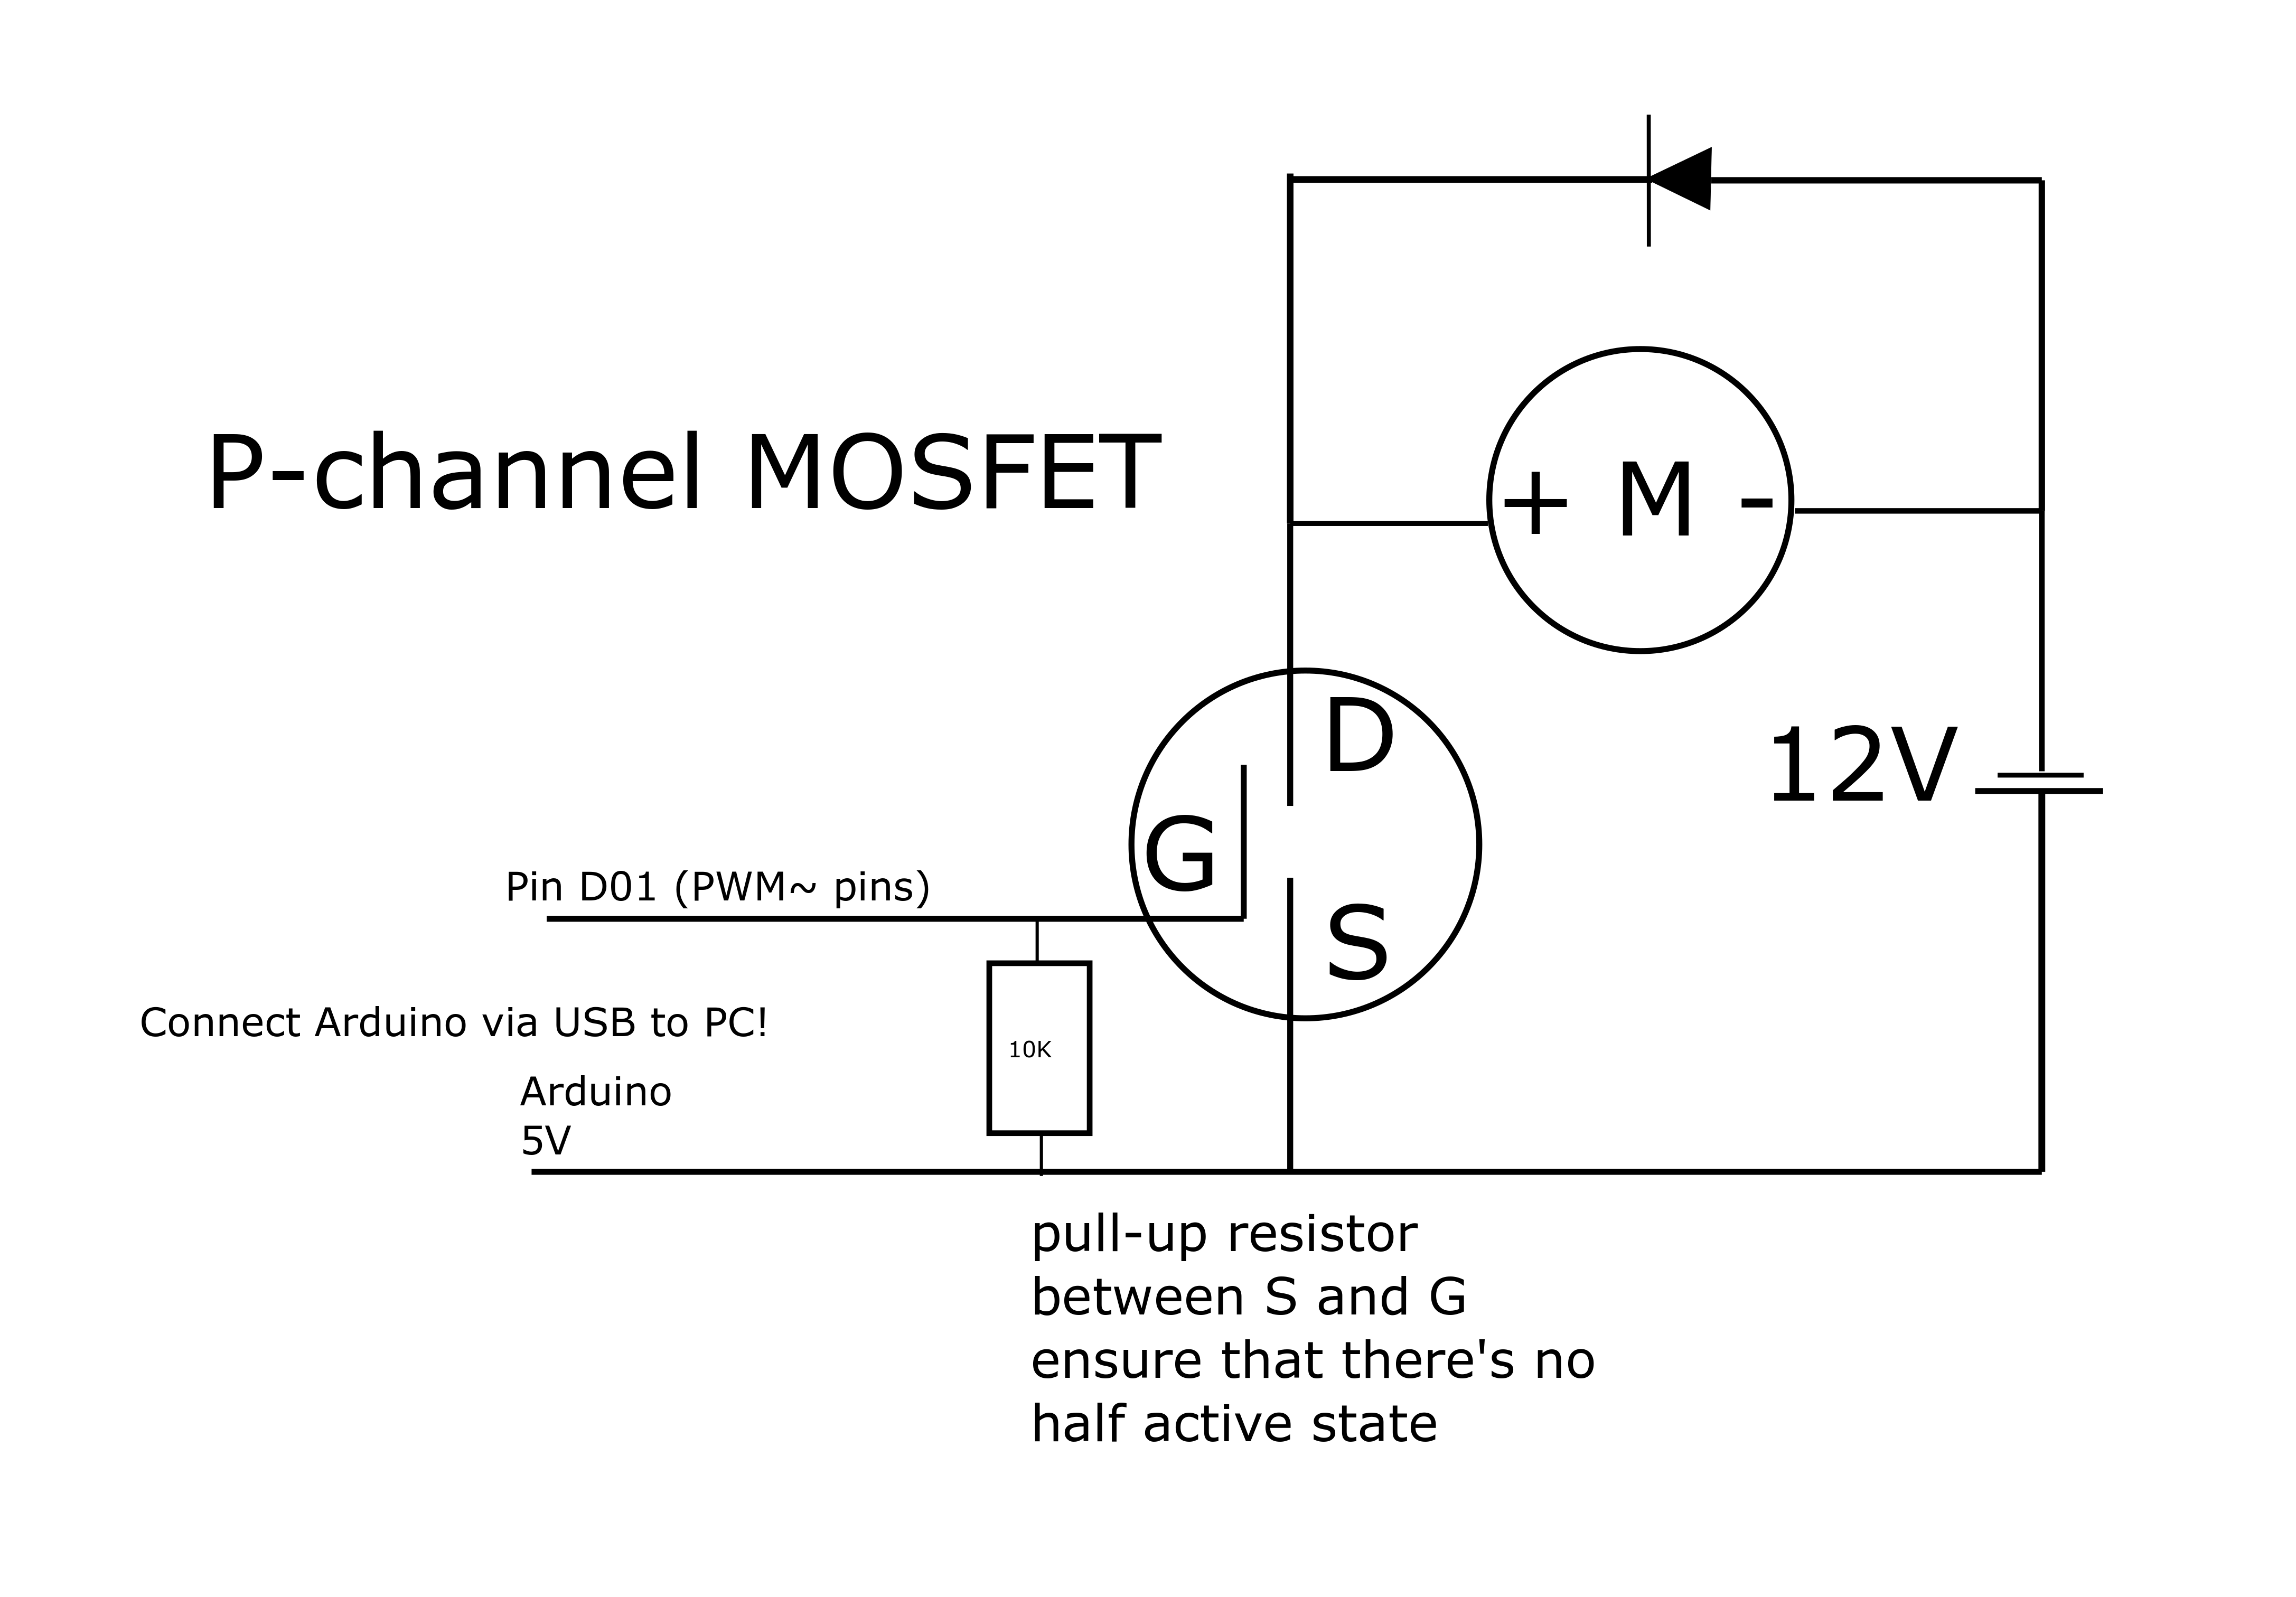

## current idea

<img 
src=attachment:PChannelMOSFET_MWswitch.png width="800"
/>
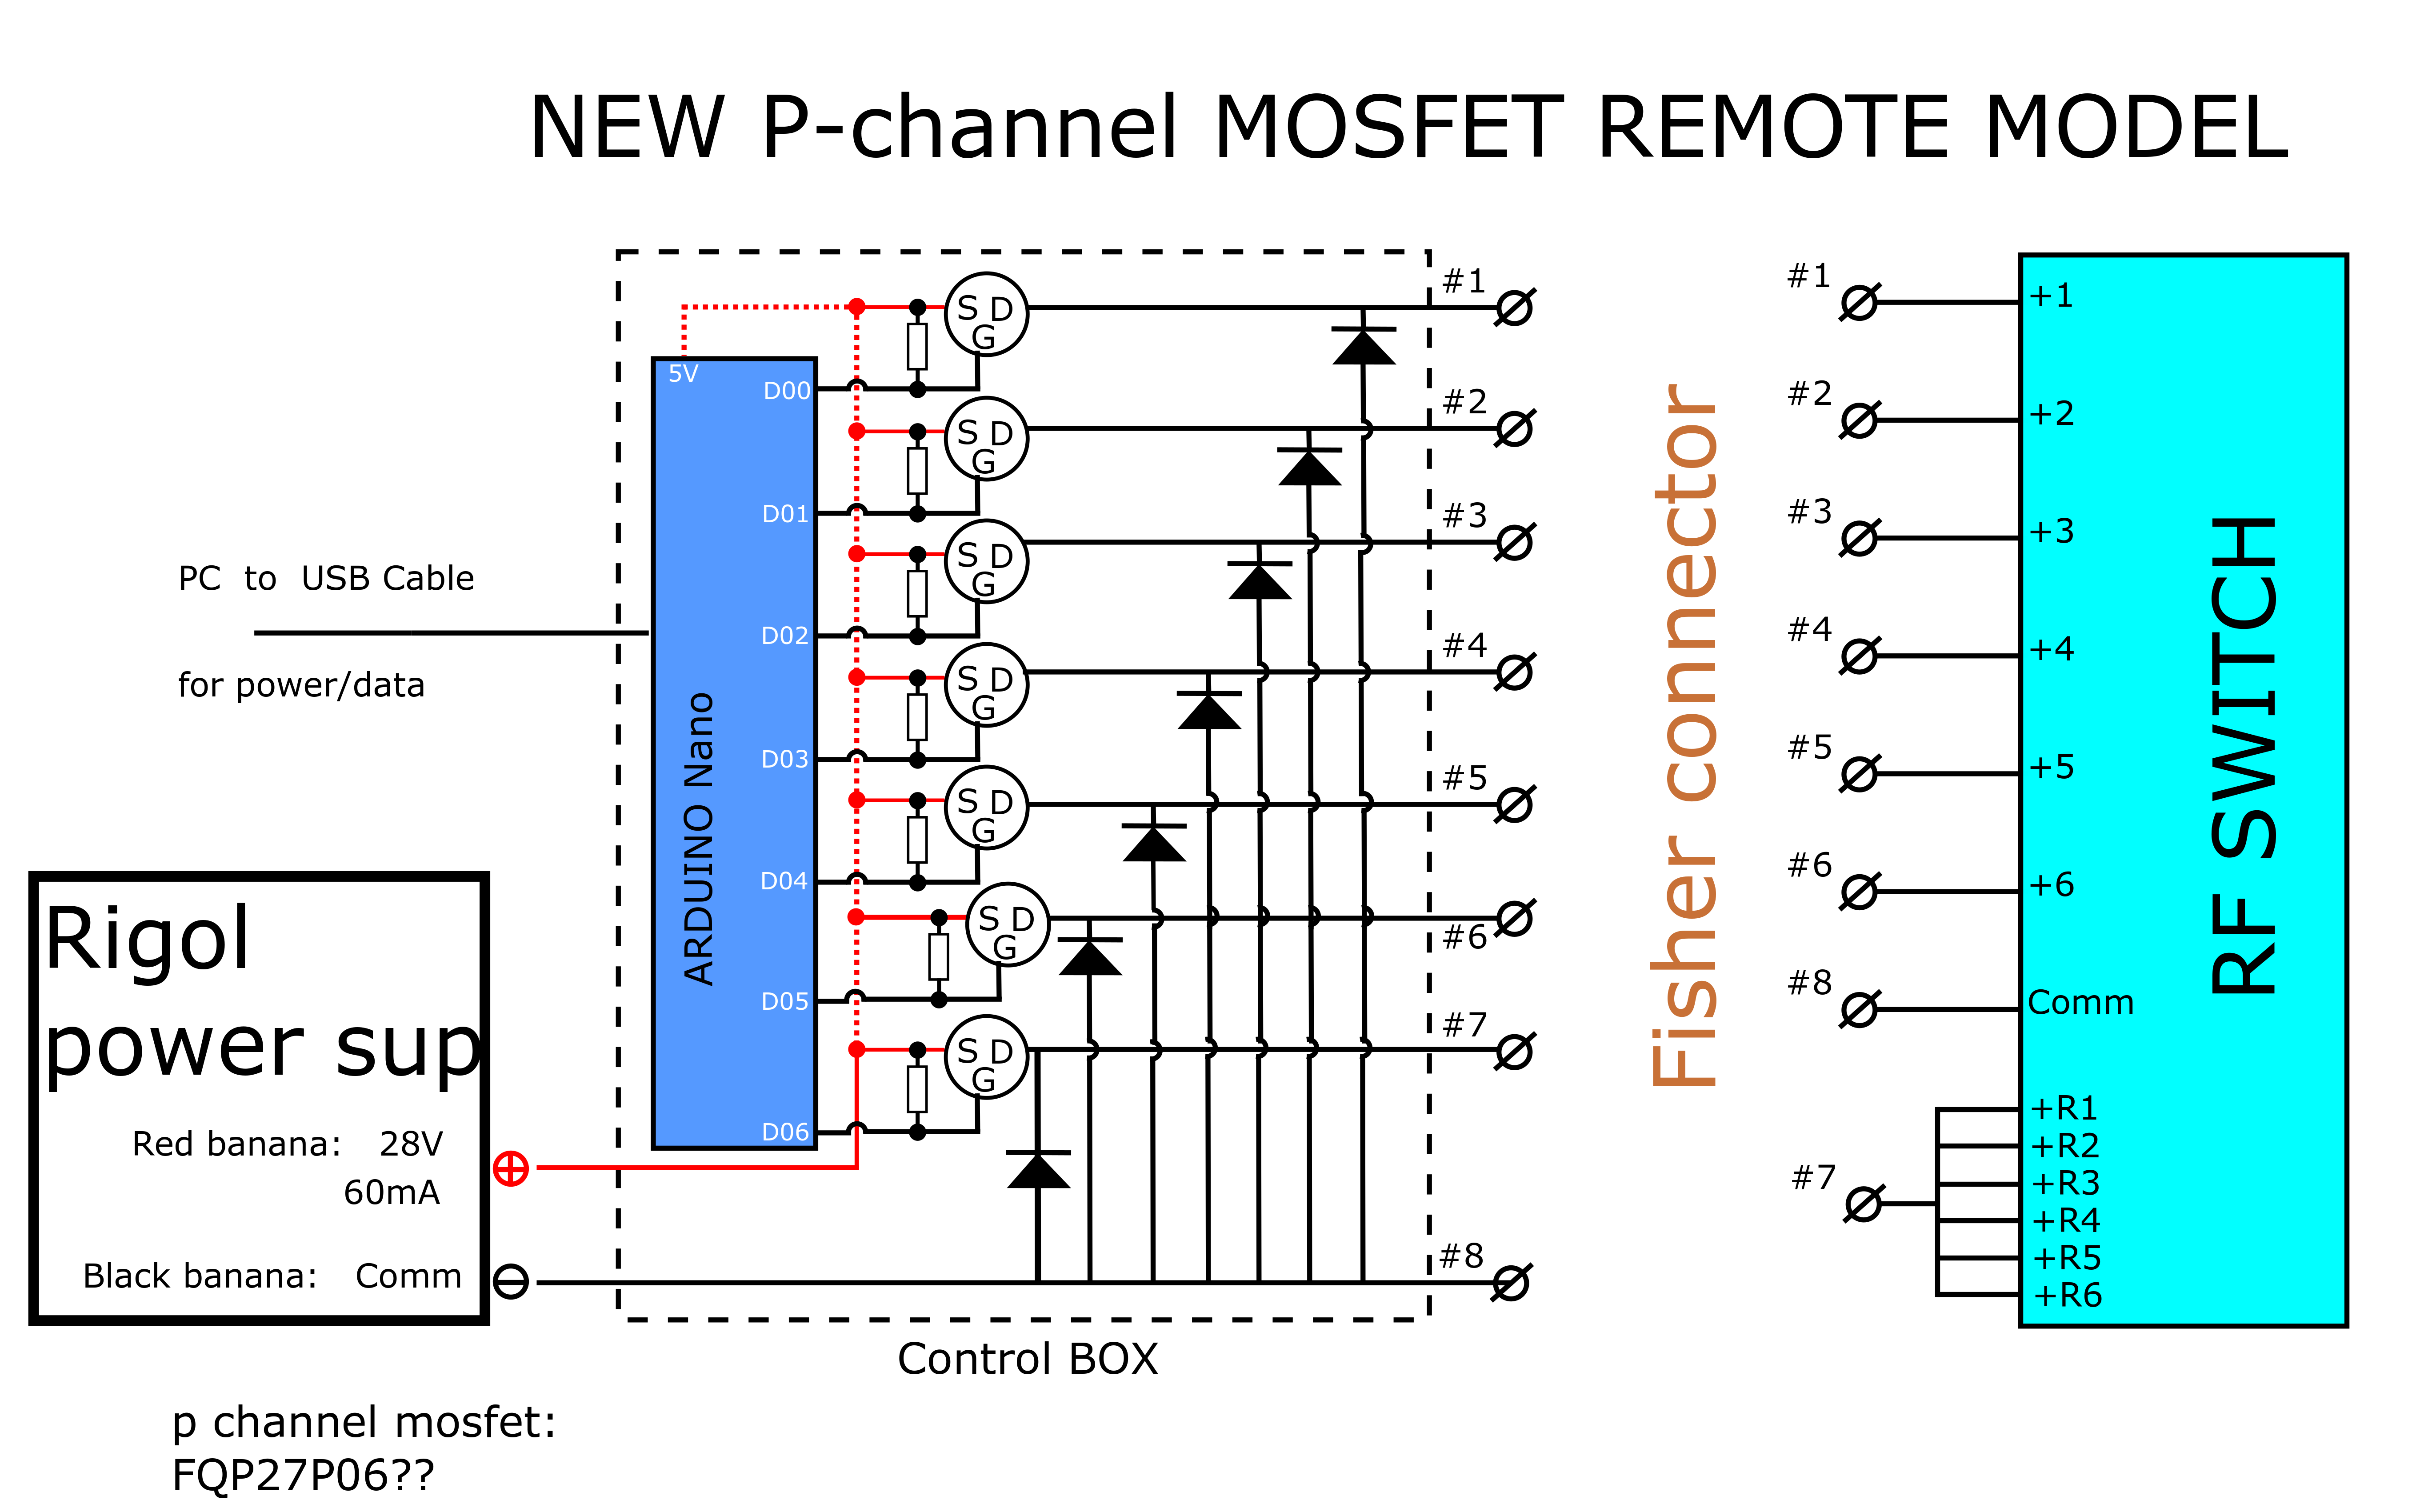

## Done?
* ordered Arduino Nano
* 

## TO DO:
* Double check if this works? Ask other group members. 
* Which MOSFET do we use?
* Which diodes do we need?